In [1]:
import numpy as np
import skimage.io as io
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
import json
from pycocotools.coco import COCO
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, os.path.abspath('..'))
# from /home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/src/resize_functions.py import *
from resize_functions import *
from greg_cnn_cSigmoid import GregNet

In [3]:
bbox_file_path = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/bbox_crop_shape_gte10k.json'
pred_poly_file_path = '/media/greghovhannisyan/BackupData1/mscoco/annotations/by_vertex/temp.json'
poly_file_path_2 = '/media/greghovhannisyan/BackupData1/mscoco/annotations/by_vertex/temp2.json'
poly_file_path = '/media/greghovhannisyan/BackupData1/mscoco/annotations/by_vertex/30_vertex_poly_adjusted.json'
#poly_file_path = '/media/greghovhannisyan/BackupData1/mscoco/annotations/crop_annotations/train2017_crop_bbox_polygons_resized.json'
image_dir_read_path_2 = '/media/greghovhannisyan/BackupData1/mscoco/images/by_vertex/temp_2/'
image_dir_read_path = '/media/greghovhannisyan/BackupData1/mscoco/images/by_vertex/30/'
#image_dir_read_path = '/media/greghovhannisyan/BackupData1/mscoco/images/train2017_crop_bbox_resized/'
annFile = '/media/greghovhannisyan/BackupData1/mscoco/annotations/instances/instances_train2017.json'

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=13.65s)
creating index...
index created!


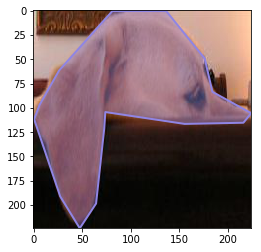

In [5]:
show_image_mask_by_id(coco, '3337', image_dir_read_path, poly_file_path)

In [30]:
#model_state_path = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/models/GregNet_MSELoss()_tensor(2504.4006)_RL_cS'
model_state_path = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/models/GregNet_MSELoss()_tensor(1.6813)'
model_state_path_l1 = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/models/GregNet_MSELoss()_tensor(0.3209)'
#model_state_path = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/models/GregNet_MSELoss()_tensor(3488.9854)'
model_instance = GregNet(15)

model_instance.eval()

GregNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

[[155.51889038085938, 80.3856430053711, 130.22898864746094, 63.15228271484375, 120.07239532470703, 34.72224807739258, 100.91907501220703, 3.6215968132019043, 55.44953536987305, 0.0, 21.276290893554688, 45.76881408691406, 7.7232160568237305, 66.96593475341797, 0.0, 72.29493713378906, 9.089842796325684, 137.52493286132812, 30.744768142700195, 158.56704711914062, 40.846370697021484, 149.0456085205078, 61.46923828125, 87.99482727050781, 59.658138275146484, 82.6407470703125, 119.06129455566406, 83.62533569335938, 154.08731079101562, 84.16205596923828]]


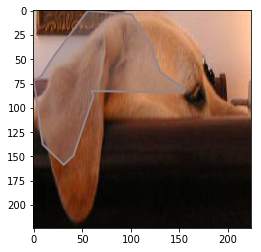

In [31]:
#show_predicted_segmentation_polygon(8786, image_dir_read_path, model_state_path_l1, model_instance, coco)
show_predicted_segmentation_polygon(3337, image_dir_read_path, model_state_path_l1, model_instance, coco)

In [13]:
with open(poly_file_path, 'r') as read_file:
    poly_json = json.load(read_file)